In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [2]:
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
sns.set_context('notebook')
sns.set_style('white')

In [3]:
# load data

def loadData(file, delimiter):
    data = np.loadtxt(file, delimiter = delimiter)
    print('Dimensions: ', data.shape)
    print(data[1:6, :])
    
    return data

In [4]:
# plot data
def plotData(data, label_x, label_y, label_pos, label_neg, axes = None):
    # get index for 0 and 1 classes respectively
    neg = data[:, 2] == 0
    pos = data[:, 2] == 1
    
    # if no specific axes obj has passed, get the current axes
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon = True, fancybox = True);

In [5]:
# loading data

data = loadData('data/ex2data1.txt', ',')

Dimensions:  (100, 3)
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]]


In [6]:
# prepare data to fit x as feature y label as target
x = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

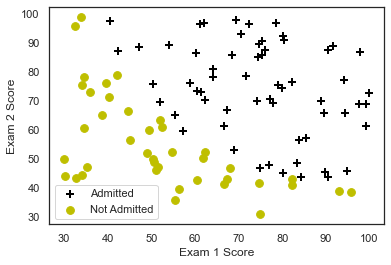

In [7]:
# plotting loaded data

plotData(data, 'Exam 1 Score','Exam 2 Score', 'Admitted', 'Not Admitted' )

In [8]:
# sigmoid function

def sigmoid(z):
    
    return (1 / (1 + np.exp(-z) ))

In [9]:
# cost function

def costFunction(theta, x, y):
    m = y.size
    h = sigmoid(x.dot(theta))
    
    J = -1 * (1 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
    
    if np.isnan(J[0]):
        
        return(np.inf)
    
    return(J[0])

In [10]:
# gradient function

def gradient(theta, x, y):
    m = y.size
    h = sigmoid(x.dot(theta.reshape(-1, 1)))
    
    grad = (1 / m) * x.T.dot(h - y)
    
    return(grad.flatten())

In [11]:
initial_theta = np.zeros(x.shape[1])
cost = costFunction(initial_theta, x, y)
grad = gradient(initial_theta, x, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599453
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [12]:
# optimize the cost function

res = minimize(costFunction, initial_theta, args=(x, y), method = None, jac = gradient, options = {'maxiter':400})

print(res)

      fun: 0.2034977015895099
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557620e-09,  4.36433485e-07, -1.39671757e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])


D:\Anaconda\envs\tf1.15\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Anaconda\envs\tf1.15\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [13]:
# def predict function
def preDict(theta, x, thershold = 0.5):
    p = sigmoid(x.dot(theta.T)) >= thershold
    
    return (p.astype('int'))

In [14]:
# predict following value exam 1 score 43 and exam 2 score 88

sigmoid(np.array([1, 43, 88]).dot(res.x.T))

0.8078544202639732

In [15]:
p = preDict(res.x, x)
print('Train accuracy {}%'.format(100 * sum(p == y.ravel()) / p.size))

Train accuracy 89.0%


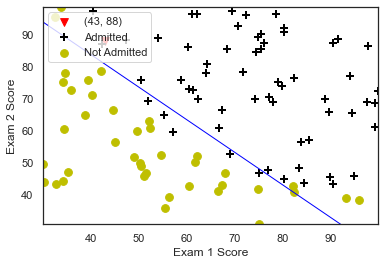

In [16]:
# plot result (Decision Boundry)

plt.scatter(43, 88, s=60, c='r', marker='v', label='(43, 88)')
plotData(data, 'Exam 1 Score', 'Exam 2 Score', 'Admitted', 'Not Admitted')
x1_min, x1_max = x[:, 1].min(), x[:, 1].max(),
x2_min, x2_max = x[:, 2].min(), x[:, 2].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))                
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths = 1, colors= 'b');